In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df_aug = pd.read_csv('final animal eval - Augustus_all.csv')
df_nn = pd.read_csv('final animal eval - ensemble.csv')
df_meta = pd.read_csv('metadata_animals.csv')

genomes = set(df_aug['genome']).intersection(set(df_nn['genome']))

df_aug = df_aug[df_aug['genome'].isin(genomes)].sort_values('genome').reset_index(drop=True)
df_nn = df_nn[df_nn['genome'].isin(genomes)].sort_values('genome').reset_index(drop=True)
df_meta = df_meta[df_meta['species'].isin(genomes)].sort_values('species').reset_index(drop=True)

df_aug = df_aug.drop(columns=['acc_overall', 'f1_ig', 'f1_utr', 'f1_exon', 'f1_intron', 'legacy_f1_cds','f1_genic'])

# add nn values and metadata to aug df
df_aug['NN'] = df_nn['sub_genic']
df_aug['total_len'] = df_meta['total_len']
df_aug['group'] = df_nn['group']
df_animals = df_aug.rename(columns={'sub_genic': 'AUG', 'genome': 'species'})

# remove training genomes
df_animals = df_animals[~df_animals['species'].isin(['mus_musculus','oryzias_latipes','gallus_gallus',
                                                     'theropithecus_gelada','anabas_testudineus',
                                                     'drosophila_melanogaster'])].reset_index(drop=True)


In [7]:
df_animals

,species,AUG,NN,total_len,group
0,acanthochromis_polyacanthus,0.7316,0.8753,991584656,ovalentaria
1,ailuropoda_melanoleuca,0.6948,0.9153,2299509015,laurasiatheria
2,amphilophus_citrinellus,0.8003,0.9123,844902565,ovalentaria
3,amphiprion_ocellaris,0.7248,0.8723,880720895,ovalentaria
4,amphiprion_percula,0.7151,0.8740,908939294,ovalentaria
5,anas_platyrhynchos_platyrhynchos,0.6093,0.8570,1136415614,bird
6,anolis_carolinensis,0.4487,0.7867,1799143587,reptile
7,anser_brachyrhynchus,0.6796,0.8754,1116992394,bird
8,aotus_nancymaae,0.5823,0.8996,2861668348,primate
9,apteryx_haastii,0.7055,0.8860,1221441152,bird


(0.0, 1.0)

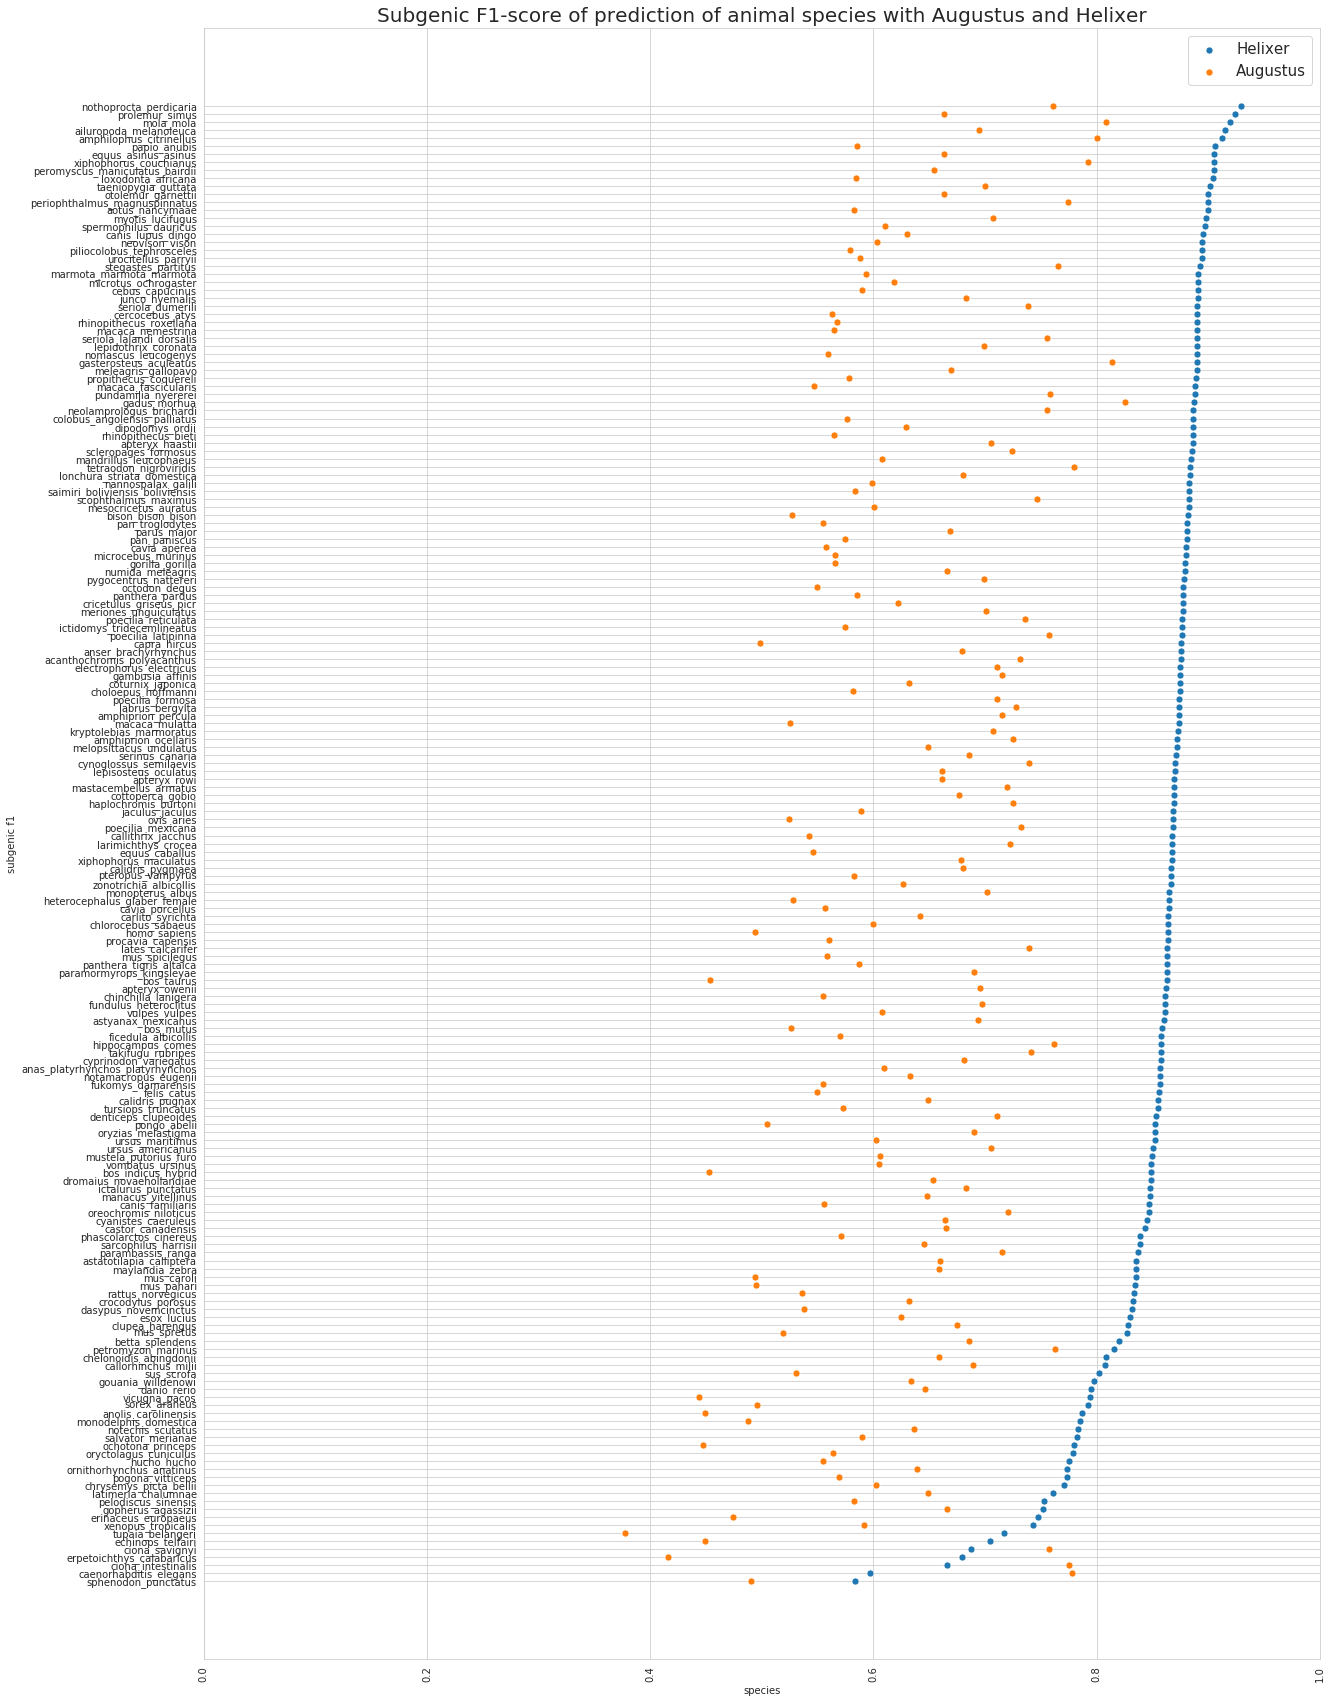

In [5]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,30))
score_plot = sns.scatterplot(y='species',x='NN',data=df_animals.sort_values(by="NN"), s=50)
score_plot = sns.scatterplot(y='species',x='AUG',data=df_animals.sort_values(by="NN"), s=50)
plt.title("Subgenic F1-score of prediction of animal species with Augustus and Helixer",fontsize=20)
plt.xlabel("species")
plt.ylabel("subgenic f1")
plt.legend(["Helixer","Augustus"],fontsize=15)
plt.xticks(rotation=90);
plt.xlim((0.0, 1.0))

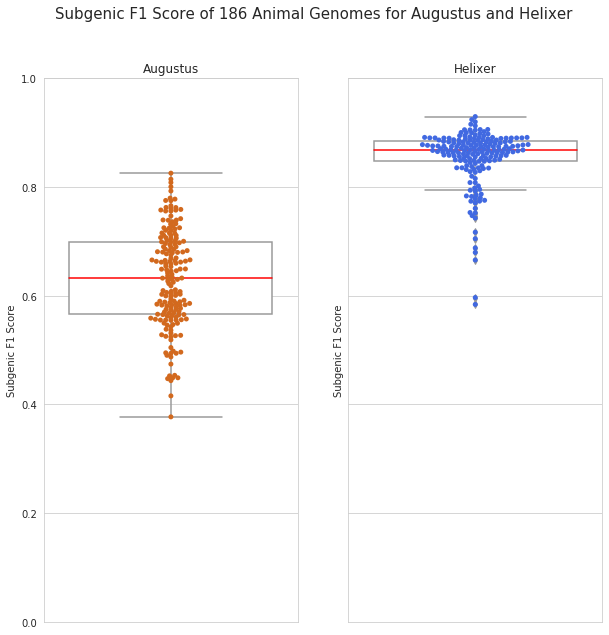

In [16]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 2,sharey=True, figsize=(10,10))

sns.boxplot(y=df_animals["AUG"],medianprops={'color':'red'},ax=axes[0],color="white")
sns.swarmplot(y="AUG", data=df_animals,ax=axes[0],color="chocolate")
axes[0].set_title('Augustus')
axes[0].set_ylabel("Subgenic F1 Score")

sns.boxplot(y=df_animals["NN"],medianprops={'color':'red'},ax=axes[1],color="white")
sns.swarmplot(y="NN", data=df_animals,ax=axes[1],color="royalblue")
axes[1].set_title('Helixer')
axes[1].set_ylabel("Subgenic F1 Score")

plt.suptitle("Subgenic F1 Score of 186 Animal Genomes for Augustus and Helixer",fontsize=15)
plt.ylim((0.0, 1.0))
plt.savefig("Animals_overall_boxplot.png", bbox_inches='tight', dpi=200)

(0.0, 1.0)

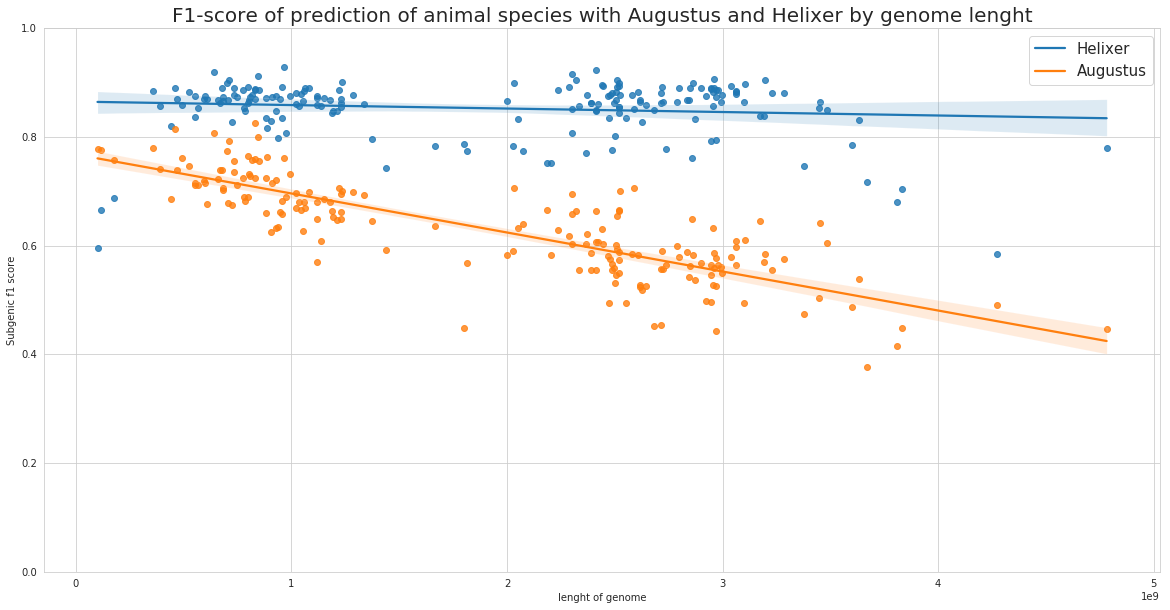

In [11]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,10))
animal_score_plot = sns.regplot(x='total_len',y='NN',data=df_animals.sort_values(by="total_len"))
animal_score_plot = sns.regplot(x='total_len',y='AUG',data=df_animals.sort_values(by="total_len"))
plt.title("F1-score of prediction of animal species with Augustus and Helixer by genome lenght",fontsize=20)
plt.xlabel("lenght of genome")
plt.ylabel("Subgenic f1 score")
plt.legend(["Helixer","Augustus"],fontsize=15);
plt.ylim((0.0, 1.0))

(0.0, 1.0)

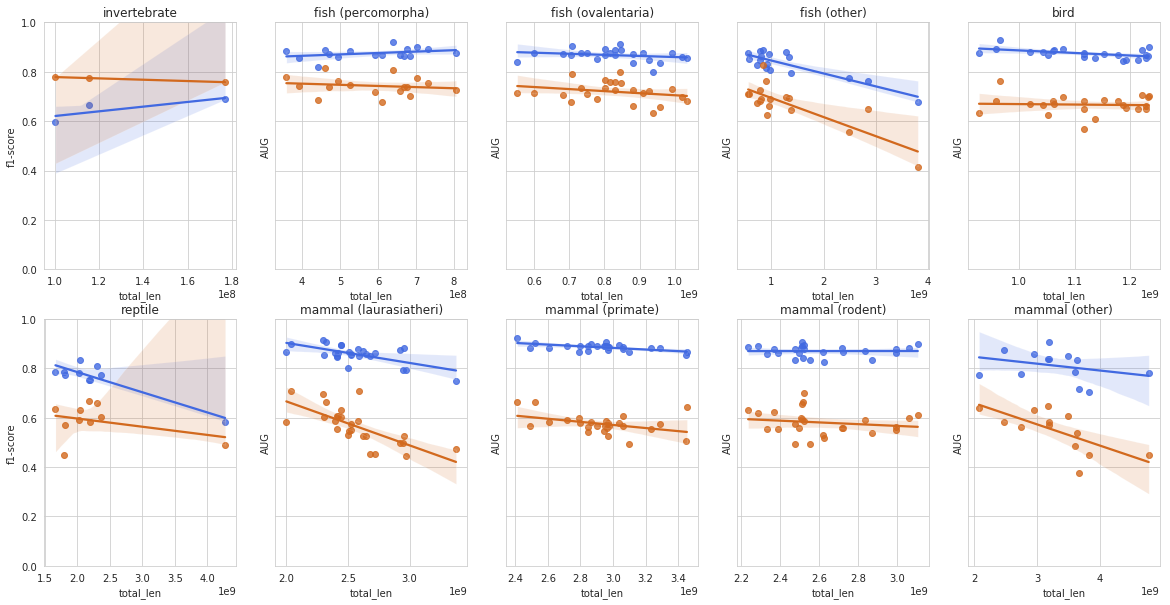

In [12]:
sns.set_style("whitegrid")
f, axes = plt.subplots(2, 5,sharey=True, figsize=(20,10))

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("invertebrate")],ax=axes[0,0],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("invertebrate")],ax=axes[0,0],color="chocolate")
axes[0,0].set_title('invertebrate')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("percomorpha")],ax=axes[0,1],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("percomorpha")],ax=axes[0,1],color="chocolate")
axes[0,1].set_title('fish (percomorpha)')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("ovalentaria")],ax=axes[0,2],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("ovalentaria")],ax=axes[0,2],color="chocolate")
axes[0,2].set_title('fish (ovalentaria)')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'] == "other fish"],ax=axes[0,3],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'] == "other fish"],ax=axes[0,3],color="chocolate")
axes[0,3].set_title('fish (other)')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("bird")],ax=axes[0,4],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("bird")],ax=axes[0,4],color="chocolate")
axes[0,4].set_title('bird')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("reptile")],ax=axes[1,0],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("reptile")],ax=axes[1,0],color="chocolate")
axes[1,0].set_title('reptile')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("laurasiatheria")],ax=axes[1,1],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("laurasiatheri")],ax=axes[1,1],color="chocolate")
axes[1,1].set_title('mammal (laurasiatheri)')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'] == "other mammal"],ax=axes[1,4],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'] == "other mammal"],ax=axes[1,4],color="chocolate")
axes[1,4].set_title('mammal (other)')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("rodent")],ax=axes[1,3],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("rodent")],ax=axes[1,3],color="chocolate")
axes[1,3].set_title('mammal (rodent)')

sns.regplot(x="total_len" ,y='NN',data=df_animals[df_animals['group'].str.contains("primate")],ax=axes[1,2],color="royalblue")
sns.regplot(x="total_len" ,y='AUG',data=df_animals[df_animals['group'].str.contains("primate")],ax=axes[1,2],color="chocolate")
axes[1,2].set_title('mammal (primate)')

axes[0,0].set_ylabel("f1-score")
axes[1,0].set_ylabel("f1-score")
plt.ylim((0.0, 1.0))